In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('/home/tuandinh/Desktop/MachineLearning/SVM machine learning/Raisin_Dataset/Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [2]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

> **Pandas dataframe.corr()** được sử dụng để tìm mối tương quan theo từng cặp của tất cả các cột trong khung dữ liệu. Mọi nagiá trị sẽ tự động bị loại trừ. Đối với bất kỳ cột kiểu dữ liệu không phải số nào trong khung dữ liệu, nó sẽ bị bỏ qua.

> Cú pháp: DataFrame.corr (self, method = 'pearson', min_periods = 1)

<AxesSubplot:>

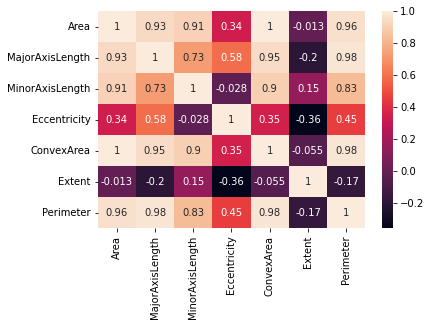

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True) # ghi giá trị dữ liệu vào mỗi ô. annot = True

In [4]:
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

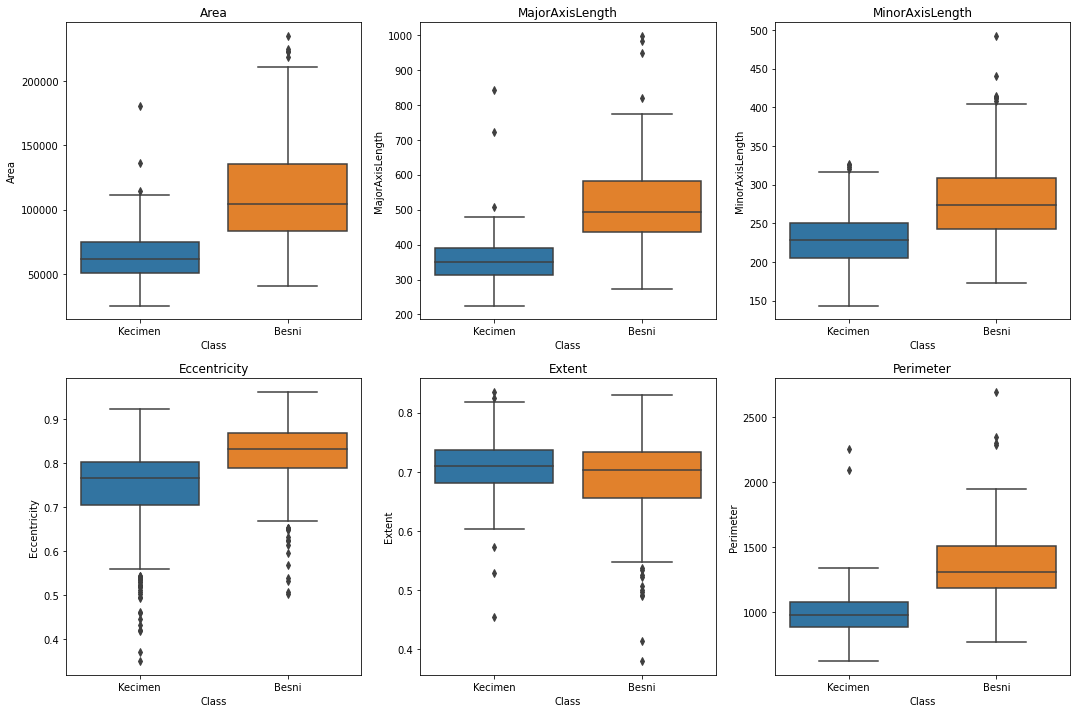

In [9]:
fig, ax = plt.subplots(2,3) # Tao 2 hang moi hang 2 bieu do
fig.set_size_inches(18,12) # set size of the chart
ax = ax.flatten()

features = df.columns.tolist()
features.remove('Class')  # not a feature
features.remove('ConvexArea') # it appears to be almost the same thing as Area
for axis, feature in zip(ax, features):
    sns.boxplot(data=df, x='Class',y= feature, ax=axis)
    axis.set_title(feature)

### **Preprocessing and PCA**

In [15]:
from sklearn.preprocessing import StandardScaler

X_raw = df.drop("Class", axis=1)
y = df.Class

scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
print(X)

[[-0.00718637  0.09757695 -0.02395819 ... -0.01570903  1.10674264
   0.06627397]
 [-0.32421719 -0.20901207 -0.22929222 ... -0.3042482  -0.28777679
  -0.16125245]
 [ 0.07829241  0.09775835  0.23698797 ...  0.06211335 -1.15824974
   0.15594468]
 ...
 [ 0.30407232  0.00670023  0.88767401 ...  0.37004063  0.77828911
   0.46387322]
 [ 0.14671134  0.39160036 -0.00624644 ...  0.15871029 -0.76180437
   0.3385864 ]
 [-0.05631357  0.69976181 -0.78493347 ... -0.04881606 -1.26290931
   0.39090133]]


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X,y)
print(X_reduced)

[[ 0.07699386 -0.45332809 -1.08921421]
 [-0.4753759   0.44536837  0.0163725 ]
 [ 0.37210892  0.80200814  0.78648709]
 ...
 [ 0.68245105 -1.30819857  0.09173245]
 [ 0.64840957  0.97924814  0.09141348]
 [ 0.48755479  2.10811637 -0.19194068]]


In [12]:
np.sum(pca.explained_variance_ratio_)

0.987703788318295

### SVM model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
print(X_train)

[[-0.04978058  1.04556343 -0.29874001]
 [-1.25546164 -2.01521394  1.81178114]
 [-0.47343388 -1.9626429   0.22857808]
 ...
 [ 3.88496068 -1.28417024 -0.5508314 ]
 [-3.57414049  1.83783415  0.52112261]
 [-2.04278939 -1.09526544  0.89310826]]


In [17]:
pranges = [0.001, 0.025, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 2, 5]
params = {"C": pranges, "gamma": ["scale"] + pranges}
clf = GridSearchCV(SVC(random_state=42), params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.001, 0.025, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5,
                               1, 2, 5],
                         'gamma': ['scale', 0.001, 0.025, 0.01, 0.025, 0.05,
                                   0.1, 0.25, 0.5, 1, 2, 5]})

In [18]:
print(f"SVC parameters: {clf.best_params_}.")
print(f"GridSearchCV accuracy: {clf.best_score_:.3f}")
print(f"Test data accuracy: {clf.score(X_test, y_test):.3f}")

SVC parameters: {'C': 0.5, 'gamma': 'scale'}.
GridSearchCV accuracy: 0.875
Test data accuracy: 0.867


/home/tuandinh/Desktop/MachineLearning/tuanenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


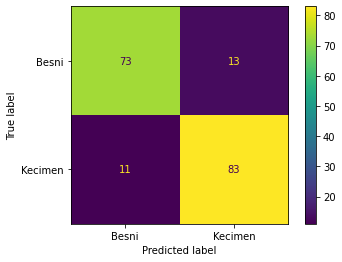

In [19]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
plt.show()